In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\hp\loan_data.csv')
df.head()

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,LP001256,Male,No,3750.0,176.0,N
1,LP001404,Female,Yes,3167.0,154.0,Y
2,LP001370,Male,No,7333.0,120.0,N
3,LP002435,Male,Yes,3539.0,55.0,N
4,LP001877,Male,Yes,4708.0,NaN,Y


In [3]:
print(df.isna().sum())
print('\n')
print(df.duplicated().sum())

Loan_ID              0
Gender               0
Married              0
ApplicantIncome    507
LoanAmount         836
Loan_Status          0
dtype: int64


8696


In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [2]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name 'parse_version' from 'sklearn.utils' (C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\__init__.py)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 3365
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Loan_ID          577 non-null    object 
 1   Gender           577 non-null    object 
 2   Married          577 non-null    object 
 3   ApplicantIncome  577 non-null    float64
 4   LoanAmount       577 non-null    float64
 5   Loan_Status      577 non-null    object 
dtypes: float64(2), object(4)
memory usage: 31.6+ KB


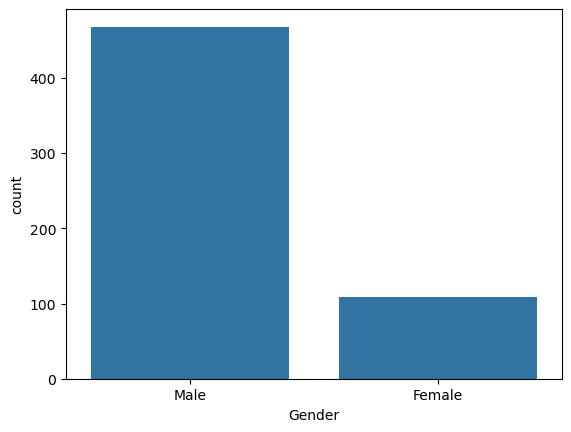

In [6]:
sns.countplot(data=df, x='Gender')
plt.show()

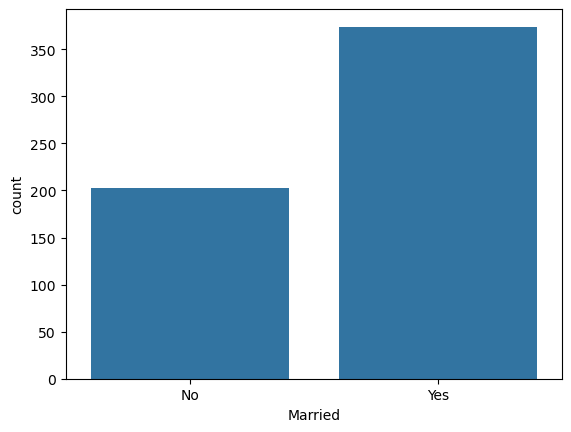

In [7]:
sns.countplot(data=df, x='Married')
plt.show()

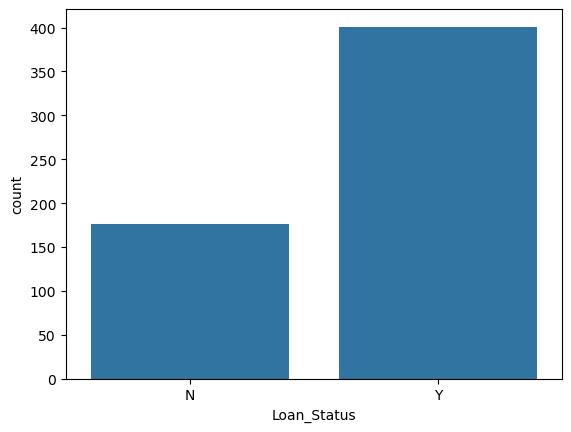

In [8]:
sns.countplot(data=df, x='Loan_Status')
plt.show()

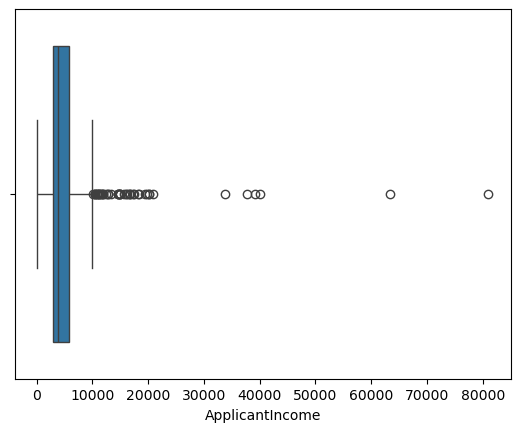

In [9]:
sns.boxplot(data=df, x='ApplicantIncome')
plt.show()

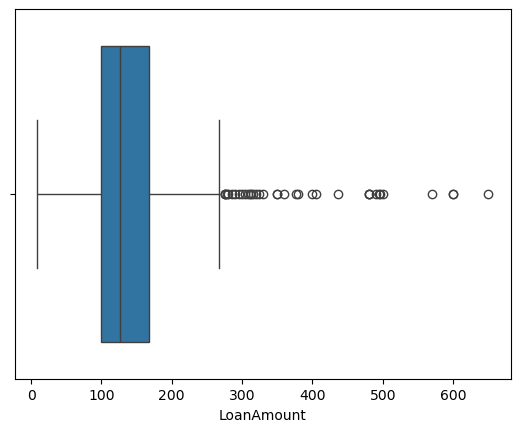

In [10]:
sns.boxplot(data=df, x='LoanAmount')
plt.show()

In [11]:
df['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.694974
N    0.305026
Name: proportion, dtype: float64

In [17]:
#from imblearn.over_sampling import SMOTE

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 3365
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Loan_ID          577 non-null    object 
 1   Gender           577 non-null    object 
 2   Married          577 non-null    object 
 3   ApplicantIncome  577 non-null    float64
 4   LoanAmount       577 non-null    float64
 5   Loan_Status      577 non-null    object 
dtypes: float64(2), object(4)
memory usage: 31.6+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Married'] = le.fit_transform(df['Married'])

In [20]:
df.head()

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,LP001256,1,0,3750.0,176.0,0
1,LP001404,0,1,3167.0,154.0,1
2,LP001370,1,0,7333.0,120.0,0
3,LP002435,1,1,3539.0,55.0,0
5,LP002205,1,0,3062.0,111.0,0


In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
y = df['Loan_Status']
X = df.drop(columns=['Loan_Status', 'Loan_ID'], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25, stratify=y, random_state=26)

In [49]:
X_train.head()

,Gender,Married,ApplicantIncome,LoanAmount
605,1,1,3273.0,81.0
804,1,1,4865.0,208.0
575,1,0,3975.0,55.0
81,1,1,3708.0,173.0
1877,1,1,6250.0,188.0


In [22]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [51]:
param_grid = {
    'n_estimators':[100, 150, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.8],
}

grid = GridSearchCV(model, param_grid=param_grid, scoring='f1', cv=6)
grid.fit(X_train,y_train)
print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Best F1 Score: 0.7614903165128272


In [57]:
model = grid.best_estimator_

In [59]:
pred = model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.26      0.20      0.23        44
           1       0.68      0.75      0.72       101

    accuracy                           0.59       145
   macro avg       0.47      0.48      0.47       145
weighted avg       0.56      0.59      0.57       145

